<a href="https://colab.research.google.com/github/hsyoongh/hg-mldl/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

👉 아래 버튼을 눌러 이미지 파일(jpg/png 등)을 올려줘!


Saving 1710838297486.jpg to 1710838297486.jpg
✅ 업로드된 이미지 파일 이름: 1710838297486.jpg


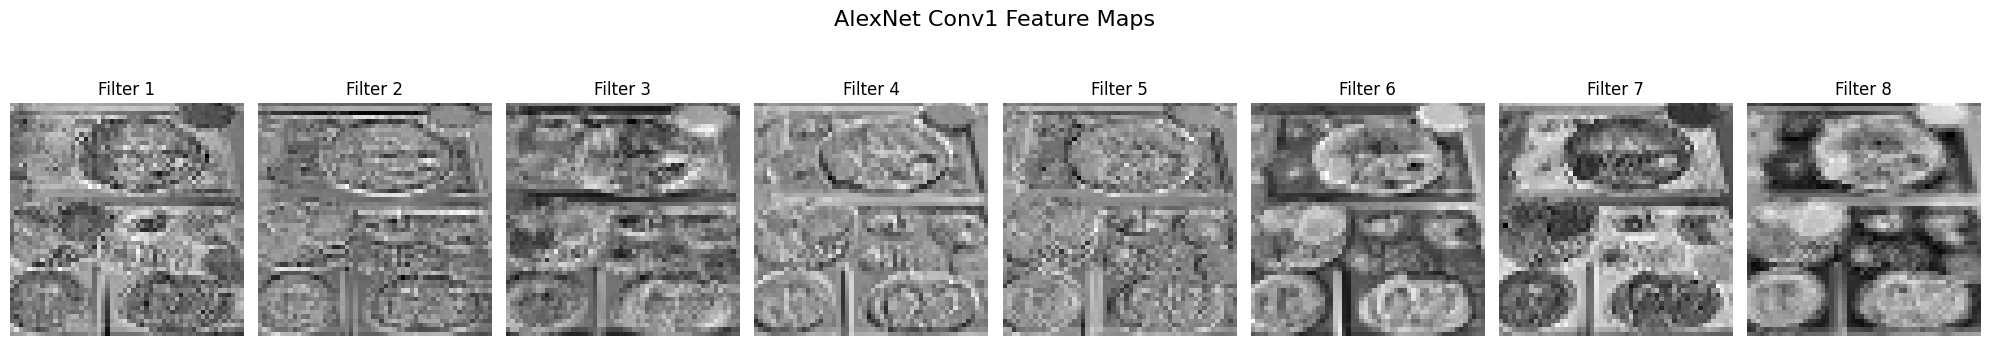

In [ ]:
# 📦 필요한 라이브러리 불러오기
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# 📁 1단계: 이미지 업로드
print("👉 아래 버튼을 눌러 이미지 파일(jpg/png 등)을 올려줘!")
uploaded = files.upload()

# 🔍 업로드된 파일 이름 가져오기
filename = list(uploaded.keys())[0]
print(f"✅ 업로드된 이미지 파일 이름: {filename}")

# 🖼️ 2단계: 이미지 불러오기 및 전처리
img = Image.open(filename).convert('RGB')  # 컬러로 변환 (3채널)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 🧠 3단계: AlexNet Conv1 구조 정의
conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)

# 🎯 4단계: Conv1 필터 적용
with torch.no_grad():
    feature_maps = conv1(img_tensor)

# 👁️ 5단계: 필터 결과 시각화 (앞의 8개만 보기)
num_show = 8
fig, axes = plt.subplots(1, num_show, figsize=(20, 4))
for i in range(num_show):
    fmap = feature_maps[0, i].cpu().numpy()
    axes[i].imshow(fmap, cmap='gray')
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')
plt.suptitle('AlexNet Conv1 Feature Maps', fontsize=16)
plt.tight_layout()
plt.show()


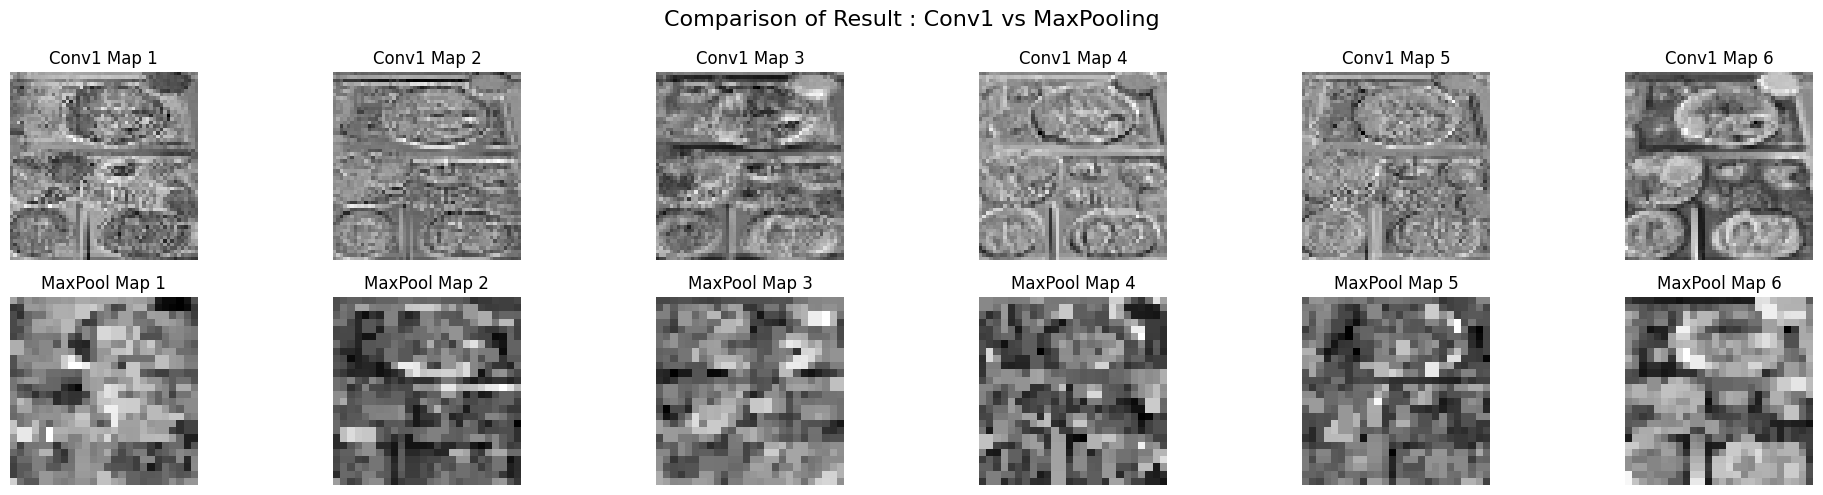

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 🔁 Conv1 그대로 유지
# 🧠 MaxPooling 레이어 정의
maxpool = nn.MaxPool2d(kernel_size=3, stride=2)

# 🧮 Conv1 출력 → Max Pooling 적용
with torch.no_grad():
    conv1_output = conv1(img_tensor)              # Conv1 출력 (96채널)
    pool_output = maxpool(conv1_output)           # MaxPooling 적용

# 👁️ 시각화: Conv1 결과와 MaxPooling 결과 비교
num_show = 6
fig, axes = plt.subplots(2, num_show, figsize=(20, 5))

for i in range(num_show):
    conv_fmap = conv1_output[0, i].cpu().numpy()
    pool_fmap = pool_output[0, i].cpu().numpy()

    axes[0, i].imshow(conv_fmap, cmap='gray')
    axes[0, i].set_title(f'Conv1 Map {i+1}')
    axes[0, i].axis('off')

    axes[1, i].imshow(pool_fmap, cmap='gray')
    axes[1, i].set_title(f'MaxPool Map {i+1}')
    axes[1, i].axis('off')

plt.suptitle("Comparison of Result : Conv1 vs MaxPooling", fontsize=16)
plt.tight_layout()
plt.show()


Saving 1710838297486.jpg to 1710838297486 (4).jpg


<ipython-input-10-568ab8eb87d0>:40: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


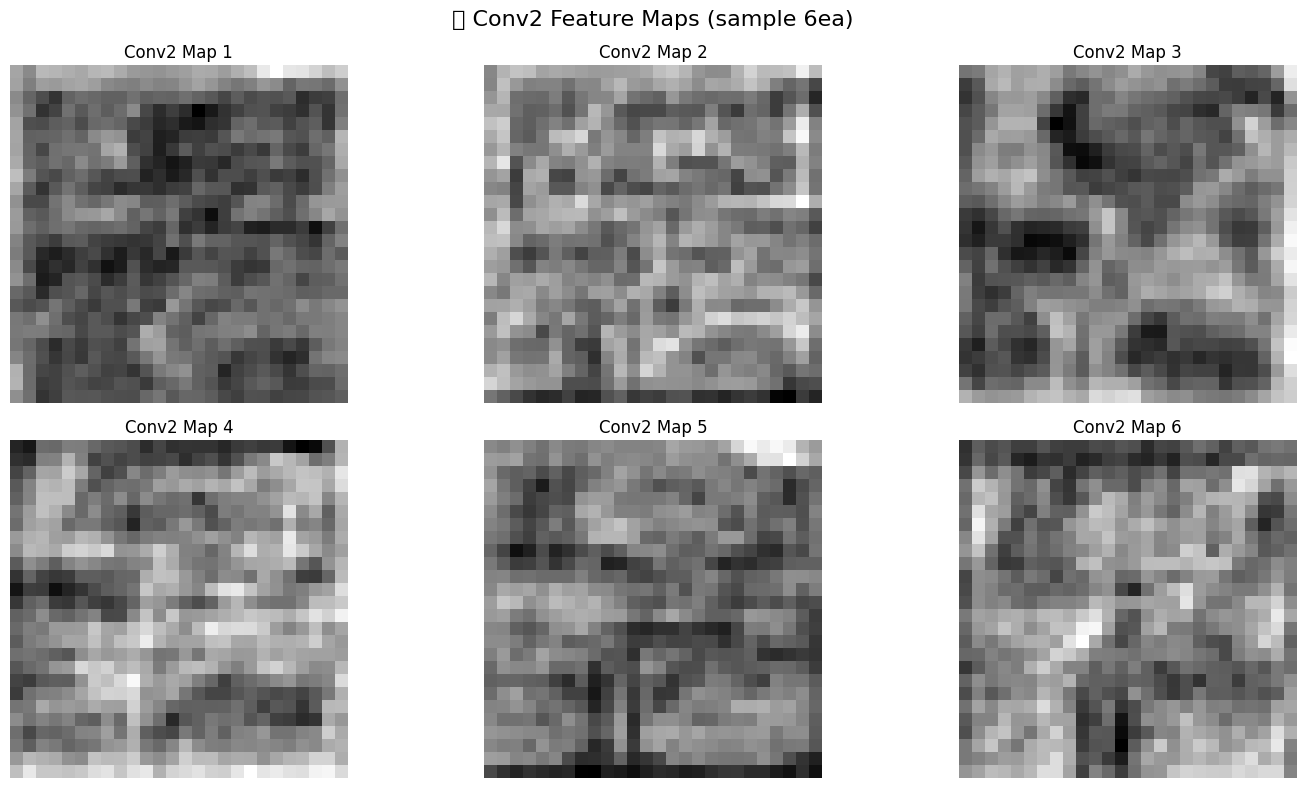

In [ ]:
# 🔁 이미지 업로드부터 다시
from google.colab import files
uploaded = files.upload()

from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 파일 이름 가져오기
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('RGB')

# 2. 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)

# 3. Conv1 → MaxPool → Conv2
conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)

with torch.no_grad():
    conv1_out = conv1(img_tensor)
    pool1_out = maxpool(conv1_out)
    conv2_out = conv2(pool1_out)

# 4. Conv2 결과 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    fmap = conv2_out[0, i].cpu().numpy()
    ax.imshow(fmap, cmap='gray')
    ax.set_title(f'Conv2 Map {i+1}')
    ax.axis('off')
plt.suptitle("🔍 Conv2 Feature Maps (sample 6ea)", fontsize=16)
plt.tight_layout()
plt.show()


Saving 1710838297486.jpg to 1710838297486 (5).jpg


<ipython-input-12-2af4ca012fcc>:45: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


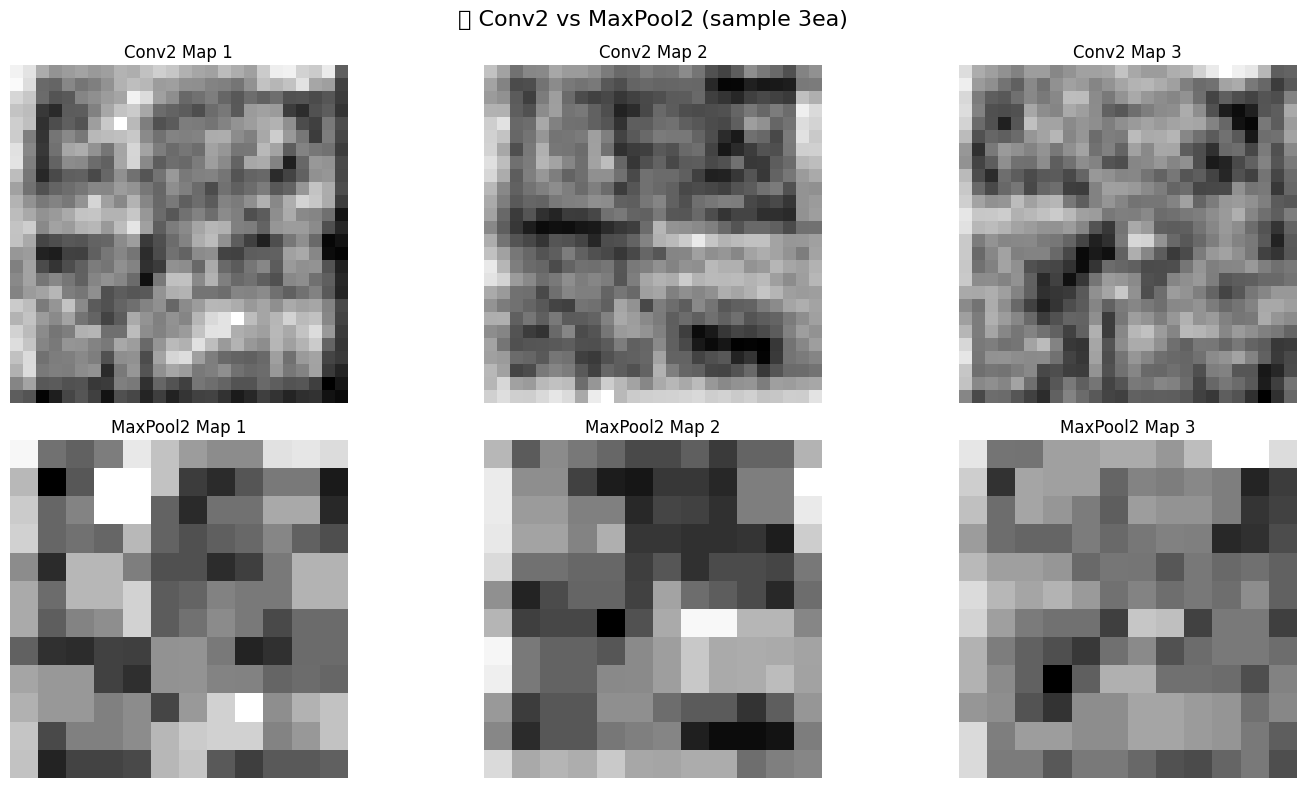

In [ ]:
from google.colab import files
uploaded = files.upload()

from PIL import Image
import torchvision.transforms as transforms

# 업로드된 파일 이름 가져오기
filename = list(uploaded.keys())[0]

# 이미지 열고 전처리
img = Image.open(filename).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)

import torch.nn as nn
import matplotlib.pyplot as plt

# Conv1~Conv2~Pool2 다시 정의
conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)

# Forward
with torch.no_grad():
    conv1_out = conv1(img_tensor)
    pool1_out = maxpool1(conv1_out)
    conv2_out = conv2(pool1_out)
    pool2_out = maxpool2(conv2_out)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i in range(3):
    axes[0, i].imshow(conv2_out[0, i].cpu().numpy(), cmap='gray')
    axes[0, i].set_title(f'Conv2 Map {i+1}')
    axes[0, i].axis('off')
    axes[1, i].imshow(pool2_out[0, i].cpu().numpy(), cmap='gray')
    axes[1, i].set_title(f'MaxPool2 Map {i+1}')
    axes[1, i].axis('off')

plt.suptitle("🔍 Conv2 vs MaxPool2 (sample 3ea)", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-13-47fb862be2ca>:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


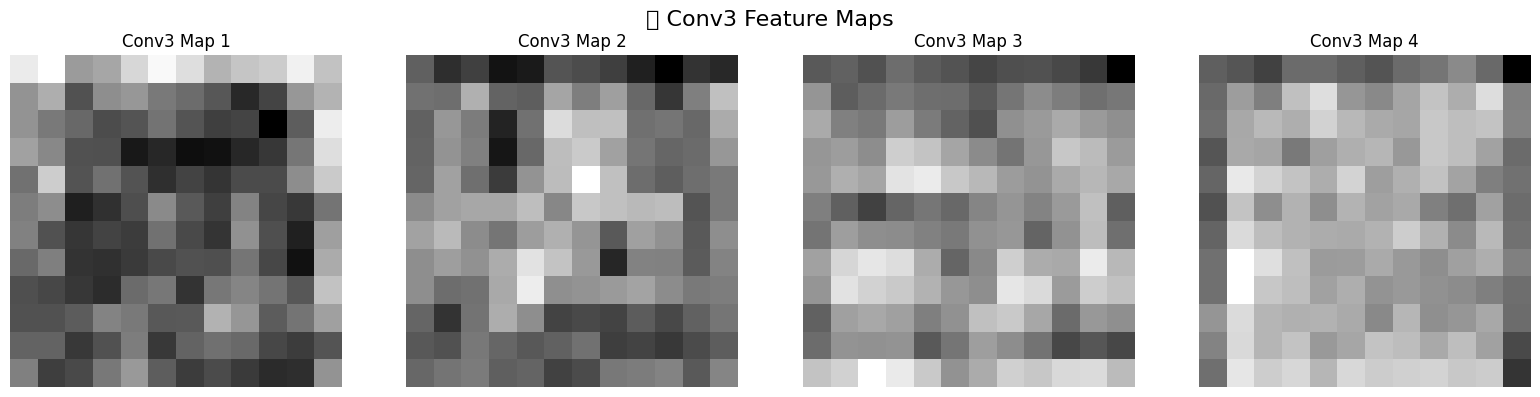

In [ ]:
# Conv3만 통과시키기
conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
with torch.no_grad():
    conv1_out = conv1(img_tensor)
    pool1_out = maxpool1(conv1_out)
    conv2_out = conv2(pool1_out)
    pool2_out = maxpool2(conv2_out)
    conv3_out = conv3(pool2_out)

# Conv3 Feature Map 시각화
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    fmap = conv3_out[0, i].cpu().numpy()
    axes[i].imshow(fmap, cmap='gray')
    axes[i].set_title(f'Conv3 Map {i+1}')
    axes[i].axis('off')
plt.suptitle("🔍 Conv3 Feature Maps", fontsize=16)
plt.tight_layout()
plt.show()


Saving 1710838297486.jpg to 1710838297486 (6).jpg


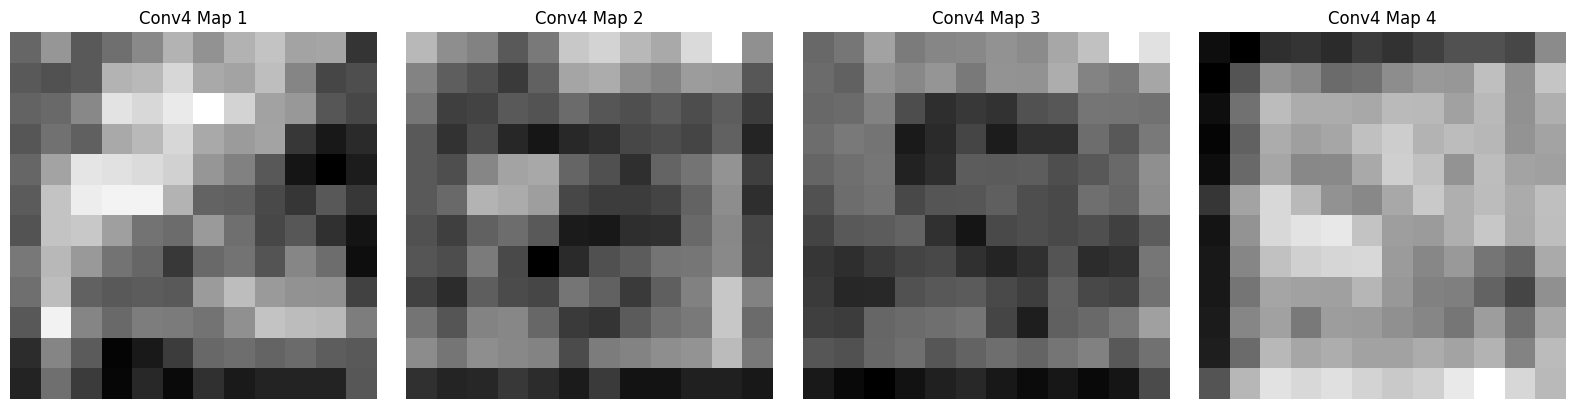

In [ ]:
# Colab 셀 1: 이미지 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 셀 2: 이미지 로딩 및 전처리
from PIL import Image
import torchvision.transforms as transforms
import torch

img = Image.open(filename).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 셀 3: AlexNet Conv1~Conv5까지 정의
import torch.nn as nn

# AlexNet Conv layers
conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2)

#셀 4: Forward + 원하는 Conv 레이어만 시각화
import matplotlib.pyplot as plt

with torch.no_grad():
    x = conv1(img_tensor)
    x = maxpool1(x)
    x = conv2(x)
    x = maxpool2(x)
    x = conv3(x)
    conv4_out = conv4(x)

# Conv4 시각화
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axes[i].imshow(conv4_out[0, i].cpu().numpy(), cmap='gray')
    axes[i].set_title(f'Conv4 Map {i+1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


Saving 1710838297486.jpg to 1710838297486 (7).jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 110MB/s]
<ipython-input-16-c18efe96ea95>:74: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


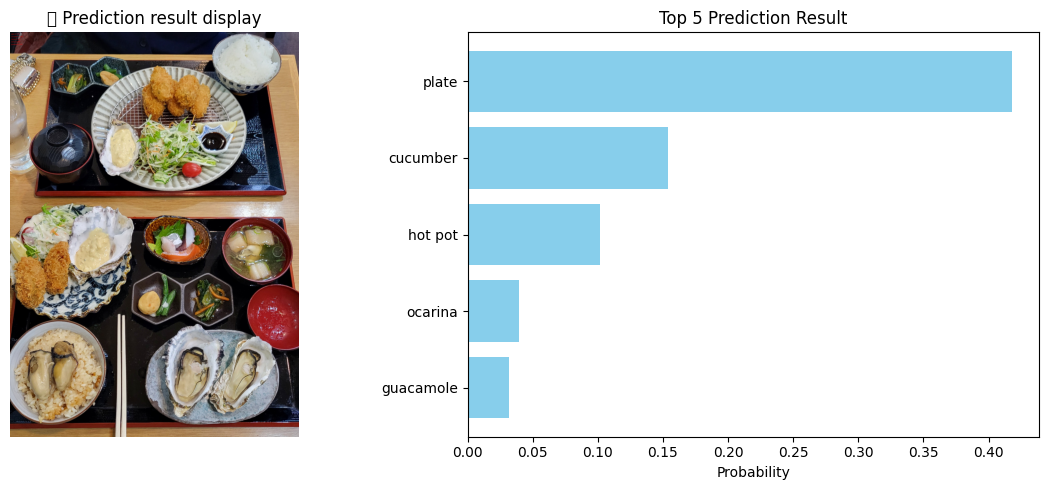

In [ ]:
# 📦 1단계: 라이브러리 불러오기
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn.functional as F
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import urllib.request
import json

# 📁 2단계: 이미지 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🖼️ 3단계: 이미지 로딩 및 전처리
img = Image.open(filename).convert("RGB")
original_img = img.copy()

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)

# 🧠 4단계: AlexNet 불러오기 및 예측
model = models.alexnet(pretrained=True)
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    probs = F.softmax(output, dim=1)

top5_probs, top5_idxs = torch.topk(probs, 5)

# 📖 5단계: 클래스 이름 불러오기
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
label_file, _ = urllib.request.urlretrieve(url)
with open(label_file) as f:
    categories = [line.strip() for line in f.readlines()]

top5_labels = [categories[i] for i in top5_idxs[0]]
top5_scores = [top5_probs[0][i].item() for i in range(5)]

# 🎨 6단계: 이미지 위에 텍스트 표시
draw = ImageDraw.Draw(original_img)
try:
    font = ImageFont.truetype("arial.ttf", 16)
except:
    font = ImageFont.load_default()

y = 10
for i in range(5):
    text = f"{top5_labels[i]} ({top5_scores[i]*100:.2f}%)"
    draw.text((10, y), text, font=font, fill=(255, 0, 0))
    y += 20

# 📊 7단계: 바 차트로 시각화
plt.figure(figsize=(12, 5))

# 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.axis('off')
plt.title("🔍 Prediction result display")

# 확률 바 차트
plt.subplot(1, 2, 2)
plt.barh(top5_labels[::-1], top5_scores[::-1], color='skyblue')
plt.xlabel("Probability")
plt.title("Top 5 Prediction Result")
plt.tight_layout()
plt.show()
